In [11]:
# for 1 ipc

from PIL import Image

ipc = 1
exp = [0, 1, 2 ,3, 4 ]
iter = 1000

for e in exp:
    image1 = Image.open('origin/vis_DC_CIFAR10_ConvNet_%dipc_exp%d_iter%d.png'%(ipc, e, iter))

    #이미지의 크기 출력
    print(image1.size)
    width = 34
    length = 34
 
    for i in range(10):
        left = 2 
        up   = 2 + (i) *length

        right =  length
        down =  (i+1) *length
        print(left, up, right, down)

        # ex. crop(left, up, rigth, down)
        croppedImage=image1.crop((left, up, right, down))
        # print("잘려진 사진 크기 :",croppedImage.size)

        # if e==0:
        #     croppedImage.save(f'GM500ipc/G-valid/%d/%d%d.png'%(i,e,i))
        # else:
        #     # croppedImage.save(f'GM2ipc/G-train/%d/%d%d.png'%(i,e,i))
        #     pass
        croppedImage.save(f'GM2ipc/G-valid/%d/%d%d.png'%(i,e,i))

(36, 342)
2 2 34 34
2 36 34 68
2 70 34 102
2 104 34 136
2 138 34 170
2 172 34 204
2 206 34 238
2 240 34 272
2 274 34 306
2 308 34 340
(36, 342)
2 2 34 34
2 36 34 68
2 70 34 102
2 104 34 136
2 138 34 170
2 172 34 204
2 206 34 238
2 240 34 272
2 274 34 306
2 308 34 340
(36, 342)
2 2 34 34
2 36 34 68
2 70 34 102
2 104 34 136
2 138 34 170
2 172 34 204
2 206 34 238
2 240 34 272
2 274 34 306
2 308 34 340
(36, 342)
2 2 34 34
2 36 34 68
2 70 34 102
2 104 34 136
2 138 34 170
2 172 34 204
2 206 34 238
2 240 34 272
2 274 34 306
2 308 34 340
(36, 342)
2 2 34 34
2 36 34 68
2 70 34 102
2 104 34 136
2 138 34 170
2 172 34 204
2 206 34 238
2 240 34 272
2 274 34 306
2 308 34 340


In [2]:
# for ipc more than 1
from PIL import Image

ipc = 10
exp = [0 ]
iter = 0

for e in exp:
    image1 = Image.open('origin/vis_DC_CIFAR10_ConvNet_%dipc_exp%d_iter%d.png'%(ipc, e, iter))

    #이미지의 크기 출력
    print(image1.size)
    width = 34
    length = 34
    for j in range(ipc):
        for i in range(10):
            left = 2 + (j) * width
            up   = 2 + (i) *length

            right = (j+1) * width
            down =  (i+1) *length
            print(left, up, right, down)

            # ex. crop(left, up, rigth, down)
            croppedImage=image1.crop((left, up, right, down))
            # print("잘려진 사진 크기 :",croppedImage.size)

            if e==4:
                croppedImage.save(f'GM2ipc/GM2ipc-valid/%d/%d%d.png'%(i,e,i))
                
            else:
                croppedImage.save(f'GM10/%d/%d%d.png'%(i,j,i))

(342, 342)
2 2 34 34
2 36 34 68
2 70 34 102
2 104 34 136
2 138 34 170
2 172 34 204
2 206 34 238
2 240 34 272
2 274 34 306
2 308 34 340
36 2 68 34
36 36 68 68
36 70 68 102
36 104 68 136
36 138 68 170
36 172 68 204
36 206 68 238
36 240 68 272
36 274 68 306
36 308 68 340
70 2 102 34
70 36 102 68
70 70 102 102
70 104 102 136
70 138 102 170
70 172 102 204
70 206 102 238
70 240 102 272
70 274 102 306
70 308 102 340
104 2 136 34
104 36 136 68
104 70 136 102
104 104 136 136
104 138 136 170
104 172 136 204
104 206 136 238
104 240 136 272
104 274 136 306
104 308 136 340
138 2 170 34
138 36 170 68
138 70 170 102
138 104 170 136
138 138 170 170
138 172 170 204
138 206 170 238
138 240 170 272
138 274 170 306
138 308 170 340
172 2 204 34
172 36 204 68
172 70 204 102
172 104 204 136
172 138 204 170
172 172 204 204
172 206 204 238
172 240 204 272
172 274 204 306
172 308 204 340
206 2 238 34
206 36 238 68
206 70 238 102
206 104 238 136
206 138 238 170
206 172 238 204
206 206 238 238
206 240 238 272
206

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

selected_indices = [989, 16103, 9745, 43520, 10860, 20737, 20953, 9129, 44840, 26979, 41081, 14762, 45686, 43308, 27682, 10884, 8785, 3670, 39376, 19380]

trainset = torchvision.datasets.CIFAR10(root='~/data/CIFAR10', train=True,
                                        download=False, transform=transform)

subset_dataset = torch.utils.data.Subset(trainset, selected_indices)

trainloader = torch.utils.data.DataLoader(subset_dataset, batch_size=1,
                                          shuffle=False, num_workers=0)


KeyError: 32

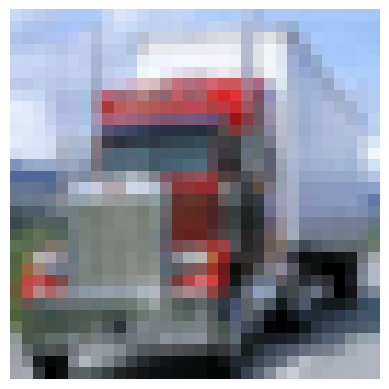

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수


def imshow(img, i):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.savefig('result/%s.png'%(i), bbox_inches='tight')

for i, data in enumerate(trainloader):
    image, label = data
    imshow(torchvision.utils.make_grid(image), i)

In [11]:
# for ipc more than 1
from PIL import Image

for i in range(20):
    image1 = Image.open('result/%d.png'%(i))

    #이미지의 크기 출력
    print(image1.size)
    # width = 34
    # length = 34
    # for j in range(ipc):
    #     for i in range(10):
    #         left = 2 + (j) * width
    #         up   = 2 + (i) *length

    #         right = (j+1) * width
    #         down =  (i+1) *length
    #         print(left, up, right, down)

    #         # ex. crop(left, up, rigth, down)
    #         croppedImage=image1.crop((left, up, right, down))
    #         # print("잘려진 사진 크기 :",croppedImage.size)
    #         croppedImage.save(f'GM10/%d/%d%d.png'%(i,j,i))


    not work!

(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
(389, 389)
